<a href="https://colab.research.google.com/github/FennexFox/-2nd/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [1]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 신경망 시작하기: 분류와 회귀

## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋

**IMDB 데이터셋 로드하기**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

**리뷰를 다시 텍스트로 디코딩하기**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

**모델 정의하기**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**모델 컴파일하기**

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련하기**

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.6962 - loss: 0.6070 - val_accuracy: 0.8657 - val_loss: 0.4116
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8889 - loss: 0.3575 - val_accuracy: 0.8774 - val_loss: 0.3289
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9137 - loss: 0.2677 - val_accuracy: 0.8887 - val_loss: 0.2881
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9287 - loss: 0.2123 - val_accuracy: 0.8862 - val_loss: 0.2854
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9462 - loss: 0.1773 - val_accuracy: 0.8896 - val_loss: 0.2747
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9539 - loss: 0.1521 - val_accuracy: 0.8809 - val_loss: 0.3064
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9567 - loss: 0.1367 - val_accuracy: 0.8770 - val_loss: 0.3083
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9624 - loss: 0.1239 - val_accuracy: 0.8823 - 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**훈련과 검증 손실 그리기**

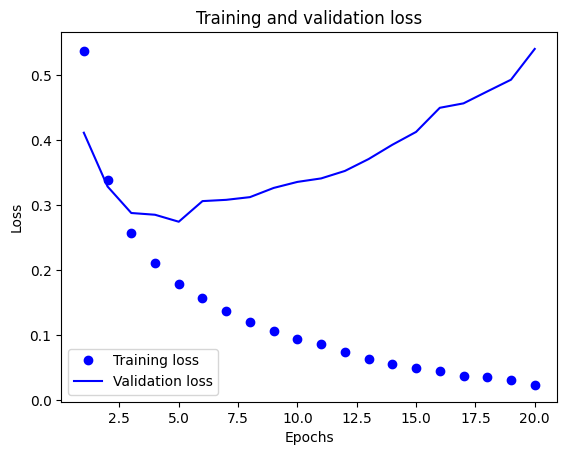

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

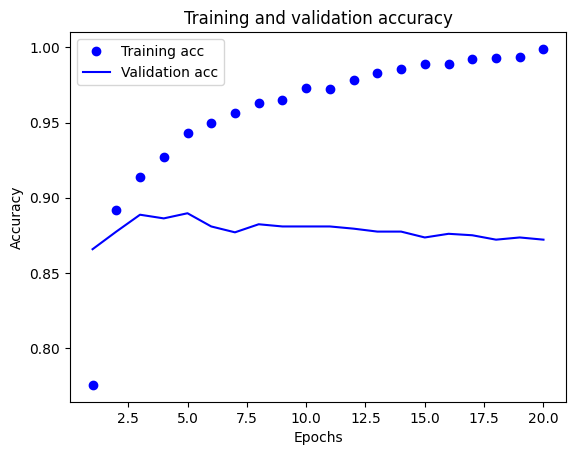

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7294 - loss: 0.5726
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8956 - loss: 0.3024
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9174 - loss: 0.2276
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9355 - loss: 0.1827
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8896 - loss: 0.2870


In [18]:
results

[0.287353515625, 0.91748046875]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [19]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1782 ],
       [0.999  ],
       [0.714  ],
       ...,
       [0.0788 ],
       [0.05072],
       [0.5337 ]], dtype=float16)

### 추가 실험

### 정리

## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [54]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [55]:
len(train_data)

8982

In [56]:
len(test_data)

2246

In [57]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**로이터 데이터셋을 텍스트로 디코딩하기**

In [58]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [59]:
train_labels[10]

3

### 데이터 준비

**데이터 인코딩하기**

In [60]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
print(x_train[10])
print(len(x_train[10]))
print(len(x_train))

[0. 1. 0. ... 0. 0. 0.]
10000
8982


In [28]:
print(train_labels[10])
print(len(train_labels))

3
8982


**레이블 인코딩하기**

In [61]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [62]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 모델 구성

**모델 정의하기**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**모델 컴파일하기**

In [32]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 훈련 검증

**검증 세트 준비하기**

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련하기**

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.4214 - loss: 3.1891 - val_accuracy: 0.6362 - val_loss: 1.8340
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6744 - loss: 1.6050 - val_accuracy: 0.6909 - val_loss: 1.3984
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7316 - loss: 1.2217 - val_accuracy: 0.7280 - val_loss: 1.2197
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7847 - loss: 0.9910 - val_accuracy: 0.7471 - val_loss: 1.1123
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8174 - loss: 0.8475 - val_accuracy: 0.7690 - val_loss: 1.0400
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8451 - loss: 0.7036 - val_accuracy: 0.7578 - val_loss: 1.0342
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8694 - loss: 0.6156 - val_accuracy: 0.8018 - val_loss: 0.9346
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8911 - loss: 0.5152 - val_accuracy: 0.7959 - val_l

**훈련과 검증 손실 그리기**

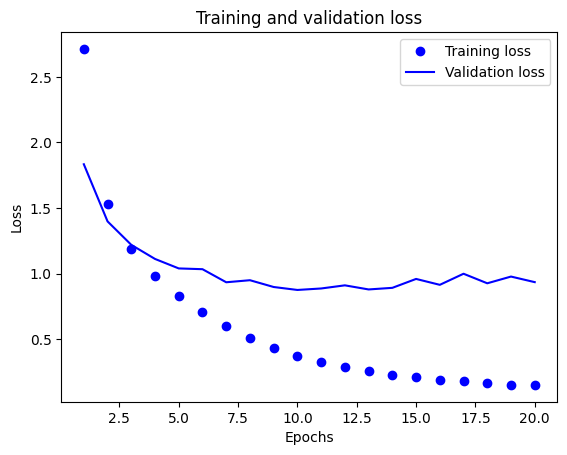

In [35]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련과 검증 정확도 그리기**

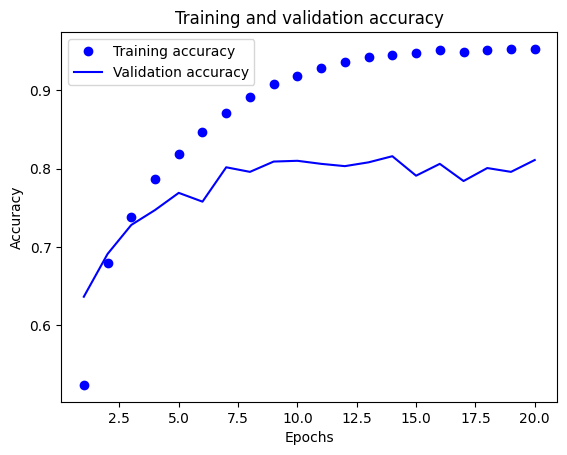

In [36]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**모델을 처음부터 다시 훈련하기**

In [37]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.3658 - loss: 3.1437
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6676 - loss: 1.5869
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7413 - loss: 1.1904
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7823 - loss: 0.9928
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8200 - loss: 0.7994
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8543 - loss: 0.6703
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8767 - loss: 0.5692
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9031 - loss: 0.4781
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9151 - loss: 0.3958
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7949 - loss: 0.9017


In [38]:
results

[0.9208984375, 0.78857421875]

In [39]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19857524487978628

### 새로운 데이터로 예측하기

In [40]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

0.9995

In [43]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [45]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 충분히 큰 중간 층을 두어야 하는 이유

**정보 병목이 있는 모델**

In [46]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.2197 - loss: 3.3469 - val_accuracy: 0.4031 - val_loss: 2.3379
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4350 - loss: 2.1181 - val_accuracy: 0.5742 - val_loss: 1.8096
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 1.5792 - val_accuracy: 0.6011 - val_loss: 1.5244
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6369 - loss: 1.3363 - val_accuracy: 0.6362 - val_loss: 1.4092
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 1.1871 - val_accuracy: 0.6670 - val_loss: 1.3662
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - loss: 1.0674 - val_accuracy: 0.6738 - val_loss: 1.3379
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.9921 - val_accuracy: 0.6968 - val_loss: 1.3057
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.9141 - val_accuracy: 0.7061 - val_loss

### 추가 실험

#### 가중치 규제를 적용한 경우
1. 과대적합 시점을 알기 위한 탐색적 훈련

In [47]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_regularizer = regularizers.l2(0.002)),
    layers.Dense(64, activation="relu", kernel_regularizer = regularizers.l2(0.002)),
    # layers.Dense(256, activation="relu", kernel_regularizer = regularizers.l2()),
    # layers.Dense(64, activation="relu"),
    # layers.Dense(64, activation="relu"),
    # layers.Dense(256, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_weight_reg = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.4030 - loss: 3.5347 - val_accuracy: 0.6152 - val_loss: 2.1621
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6572 - loss: 1.9943 - val_accuracy: 0.6748 - val_loss: 1.7305
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7281 - loss: 1.5562 - val_accuracy: 0.7231 - val_loss: 1.5234
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7705 - loss: 1.3436 - val_accuracy: 0.7402 - val_loss: 1.4102
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7974 - loss: 1.2115 - val_accuracy: 0.7749 - val_loss: 1.3340
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8298 - loss: 1.0767 - val_accuracy: 0.7842 - val_loss: 1.2881
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8475 - loss: 0.9917 - val_accuracy: 0.7920 - val_loss: 1.2598
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8691 - loss: 0.9191 - val_accuracy: 0.7832 - val_l

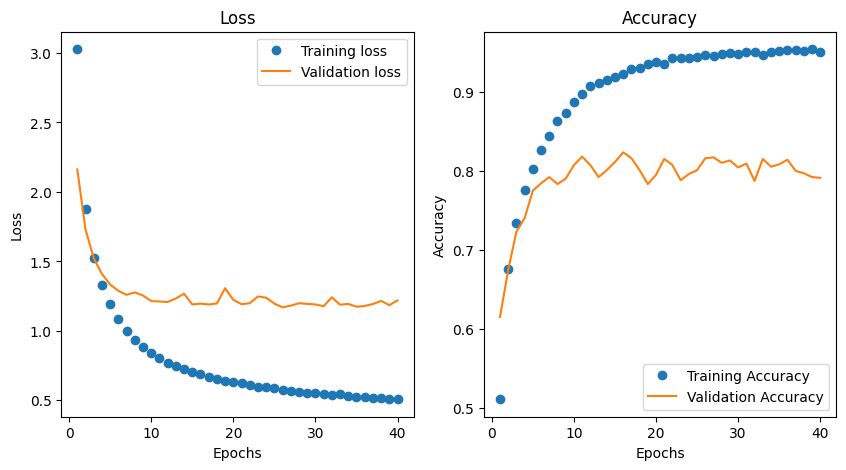

In [48]:
loss = history_weight_reg.history["loss"]
val_loss = history_weight_reg.history["val_loss"]
acc = history_weight_reg.history["accuracy"]
val_acc = history_weight_reg.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (10, 5))

train_val_loss = fig.add_subplot(1, 2, 1)
train_val_loss.plot(epochs, loss, 'o', label = "Training loss")
train_val_loss.plot(epochs, val_loss, '', label = "Validation loss")
train_val_loss.set_title("Loss")
train_val_loss.set_xlabel("Epochs")
train_val_loss.set_ylabel("Loss")
# train_val_loss.set_ylim([0.5, 1.5])
train_val_loss.legend()

train_val_acc = fig.add_subplot(1, 2, 2)
train_val_acc.plot(epochs, acc, 'o', label = "Training Accuracy")
train_val_acc.plot(epochs, val_acc, '', label = "Validation Accuracy")
train_val_acc.set_title("Accuracy")
train_val_acc.set_xlabel("Epochs")
train_val_acc.set_ylabel("Accuracy")
# train_val_acc.set_ylim([0.9, 1])
train_val_acc.legend()

plt.show()

2. 11번의 에포크에 대해 재훈련 및 결과 출력



In [63]:
history_weight_reg = model.fit(x_train,
                              y_train,
                              epochs=11,
                              batch_size=512,)

model.evaluate(x_test, y_test)

Epoch 1/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9363 - loss: 0.5729
Epoch 2/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9449 - loss: 0.5331
Epoch 3/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9512 - loss: 0.5178 
Epoch 4/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9527 - loss: 0.5081
Epoch 5/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9504 - loss: 0.5154
Epoch 6/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9495 - loss: 0.5104
Epoch 7/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9548 - loss: 0.4865
Epoch 8/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9515 - loss: 0.4962
Epoch 9/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9568 - loss: 0.4738
Epoch 10/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9531 - loss: 0.4954
Epoch 11/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9565 - loss: 0.4686
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7928 - loss: 1.2

[1.2265625, 0.78759765625]

#### 드랍아웃을 적용한 경우
1. 과대적합 시점을 알기 위한 탐색적 훈련

In [89]:
# 모델 정의

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [83]:
# 탐색적 훈련

history_dropout = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.3774 - loss: 2.7929 - val_accuracy: 0.6758 - val_loss: 1.4043
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6884 - loss: 1.3551 - val_accuracy: 0.7402 - val_loss: 1.1523
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7565 - loss: 1.0881 - val_accuracy: 0.7612 - val_loss: 1.0479
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7935 - loss: 0.8732 - val_accuracy: 0.8071 - val_loss: 0.9341
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8346 - loss: 0.7216 - val_accuracy: 0.8062 - val_loss: 0.9043
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8496 - loss: 0.6216 - val_accuracy: 0.8149 - val_loss: 0.8496
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8815 - loss: 0.4954 - val_accuracy: 0.8208 - val_loss: 0.8521
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8971 - loss: 0.4387 - val_accuracy: 0.8198 - val_los

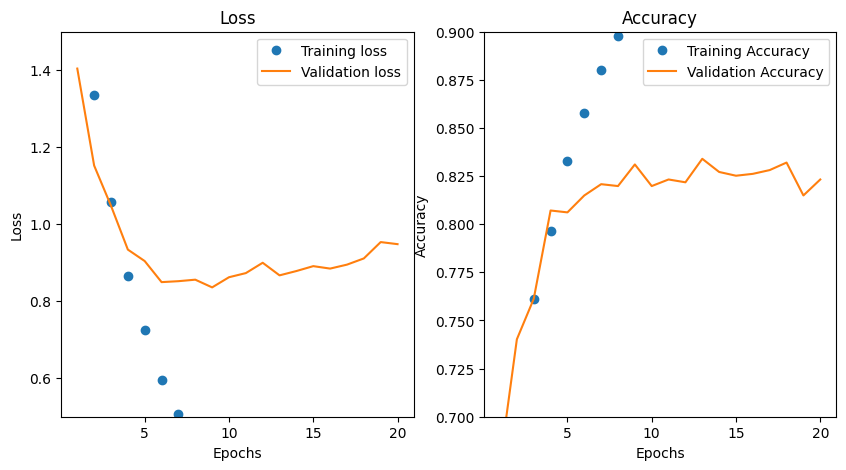

In [84]:
# 시각화

loss = history_dropout.history["loss"]
val_loss = history_dropout.history["val_loss"]
acc = history_dropout.history["accuracy"]
val_acc = history_dropout.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (10, 5))

train_val_loss = fig.add_subplot(1, 2, 1)
train_val_loss.plot(epochs, loss, 'o', label = "Training loss")
train_val_loss.plot(epochs, val_loss, '', label = "Validation loss")
train_val_loss.set_title("Loss")
train_val_loss.set_xlabel("Epochs")
train_val_loss.set_ylabel("Loss")
train_val_loss.legend()

train_val_acc = fig.add_subplot(1, 2, 2)
train_val_acc.plot(epochs, acc, 'o', label = "Training Accuracy")
train_val_acc.plot(epochs, val_acc, '', label = "Validation Accuracy")
train_val_acc.set_title("Accuracy")
train_val_acc.set_xlabel("Epochs")
train_val_acc.set_ylabel("Accuracy")
train_val_acc.legend()

train_val_loss.set_ylim([0.5, 1.5])
train_val_acc.set_ylim([0.7, 0.9])

plt.show()

2. 7번의 에포크에 대해 재훈련 및 결과 출력

In [91]:
history_weight_reg = model.fit(x_train,
                    y_train,
                    epochs=7,
                    batch_size=512,)

model.evaluate(x_test, y_test)

Epoch 1/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9087 - loss: 0.3928
Epoch 2/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9222 - loss: 0.3460
Epoch 3/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9247 - loss: 0.3165
Epoch 4/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9328 - loss: 0.2757
Epoch 5/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.2468
Epoch 6/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9463 - loss: 0.2098
Epoch 7/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9469 - loss: 0.1941
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.9439


[0.98046875, 0.8095703125]

### 정리

## 주택 가격 예측: 회귀 문제

### 보스턴 주택 가격 데이터셋

**보스턴 주택 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### 데이터 준비

**데이터 정규화하기**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 모델 구성

**모델 정의하기**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### K-겹 검증을 사용한 훈련 검증

**K-겹 검증하기**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**각 폴드의 검증 점수를 저장하기**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**K-겹 검증 점수 평균을 기록하기**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**검증 점수 그래프 그리기**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**최종 모델 훈련하기**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### 정리

## 요약